In [401]:
# Class:     AI & Machine Learning Bootcamp
# Course:    Deep Learning with TensorFlow and Keras
# Project:   Lending Club Loan Data Analysis
# Author:    Eddie Pacheco
# Date:      August 25 2024

## Objective: 
Create a model that predicts whether or not a loan will be default using historical data.
## Problem Statement:
For companies like Lending Club correctly predicting whether or not a loan will be a
default is very important. In this project, using historical data from 2007 to 2015, you
have to build a deep learning model to predict the chance of default for future loans.
As you will see later, this dataset is highly imbalanced and includes a lot of features
that make this problem more challenging.
## Domain: 
Finance
## Analysis to be done: 
Perform data preprocessing and build a deep learning
prediction model.

## Steps to perform:
Perform exploratory data analysis and then apply feature
engineering. Follow up with a deep learning model to predict whether or not the
loan will be default using the historical data.

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import keras_tuner
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [403]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


* Our target variable is not.fully.paid.

## Perform data quality checks by checking for missing values, if any.

In [404]:
df.shape

(9578, 14)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


* We observe that the 'purpose' feature is categorical and will need to be encoded for the model.

In [406]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [407]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [408]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

* There are no missing or null values in the data set.

## 1. Feature Transformation.
Transform categorical values into numerical values (discrete).

In [409]:
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True)

## 2. Exploratory data analysis of different factors in the dataset.

In [410]:
from vizad.univariate import plot_univariate_numeric,plot_univariate_categorical
from vizad.bivariate import plot_bivariate_numeric,plot_bivariate_categorical

In [411]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()
cat_cols = [col for col in df.columns if col not in num_cols]

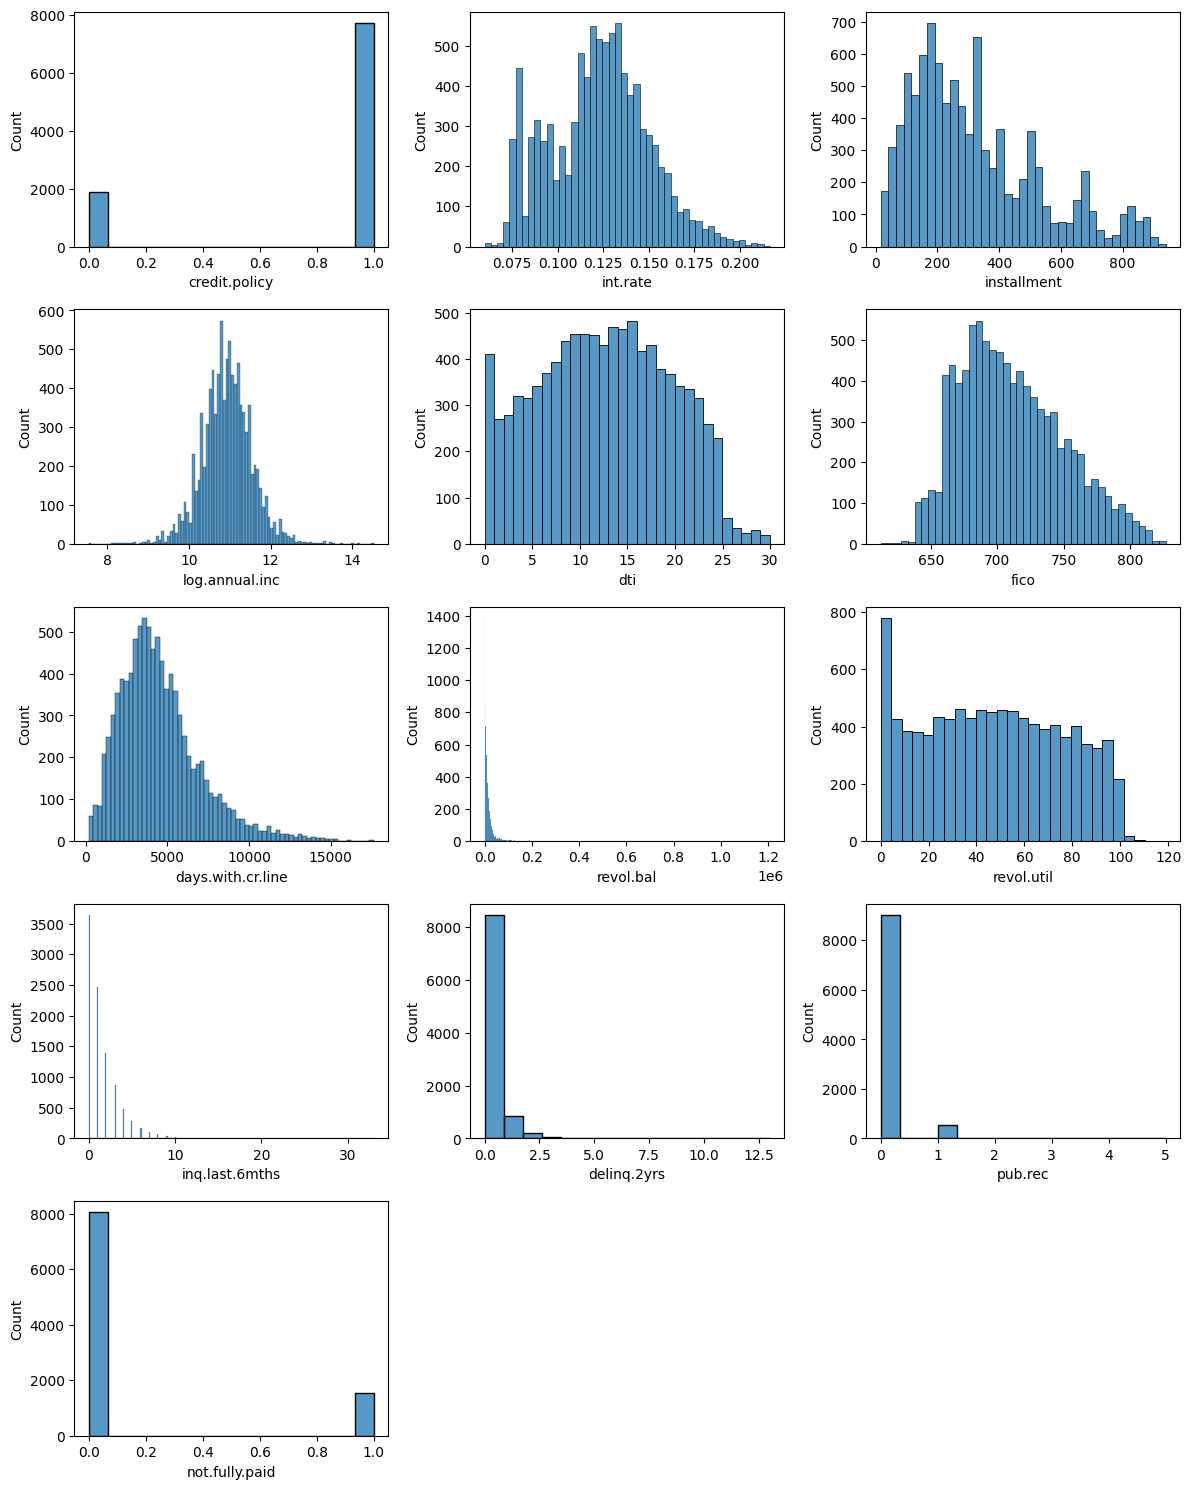

In [412]:
plot_univariate_numeric(df, num_cols, figsize=(12,6), kind = 'hist');

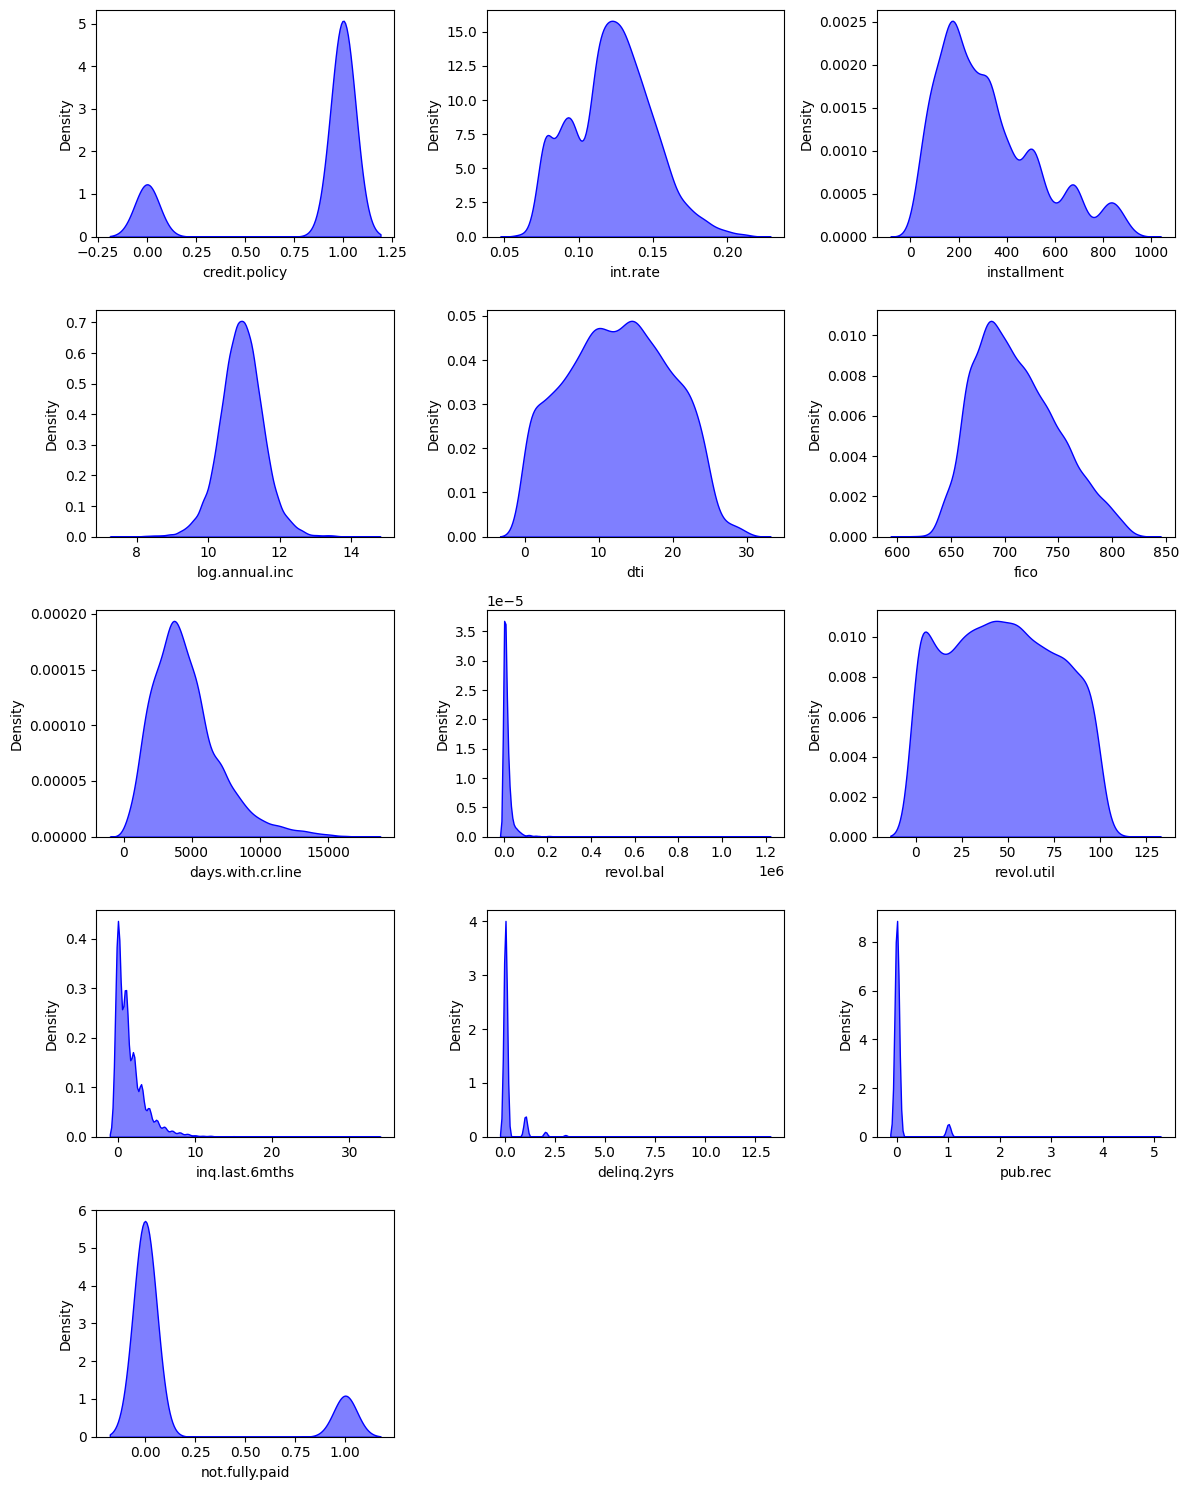

In [413]:
plot_univariate_numeric(df, num_cols, figsize=(12,6), kind = 'density');

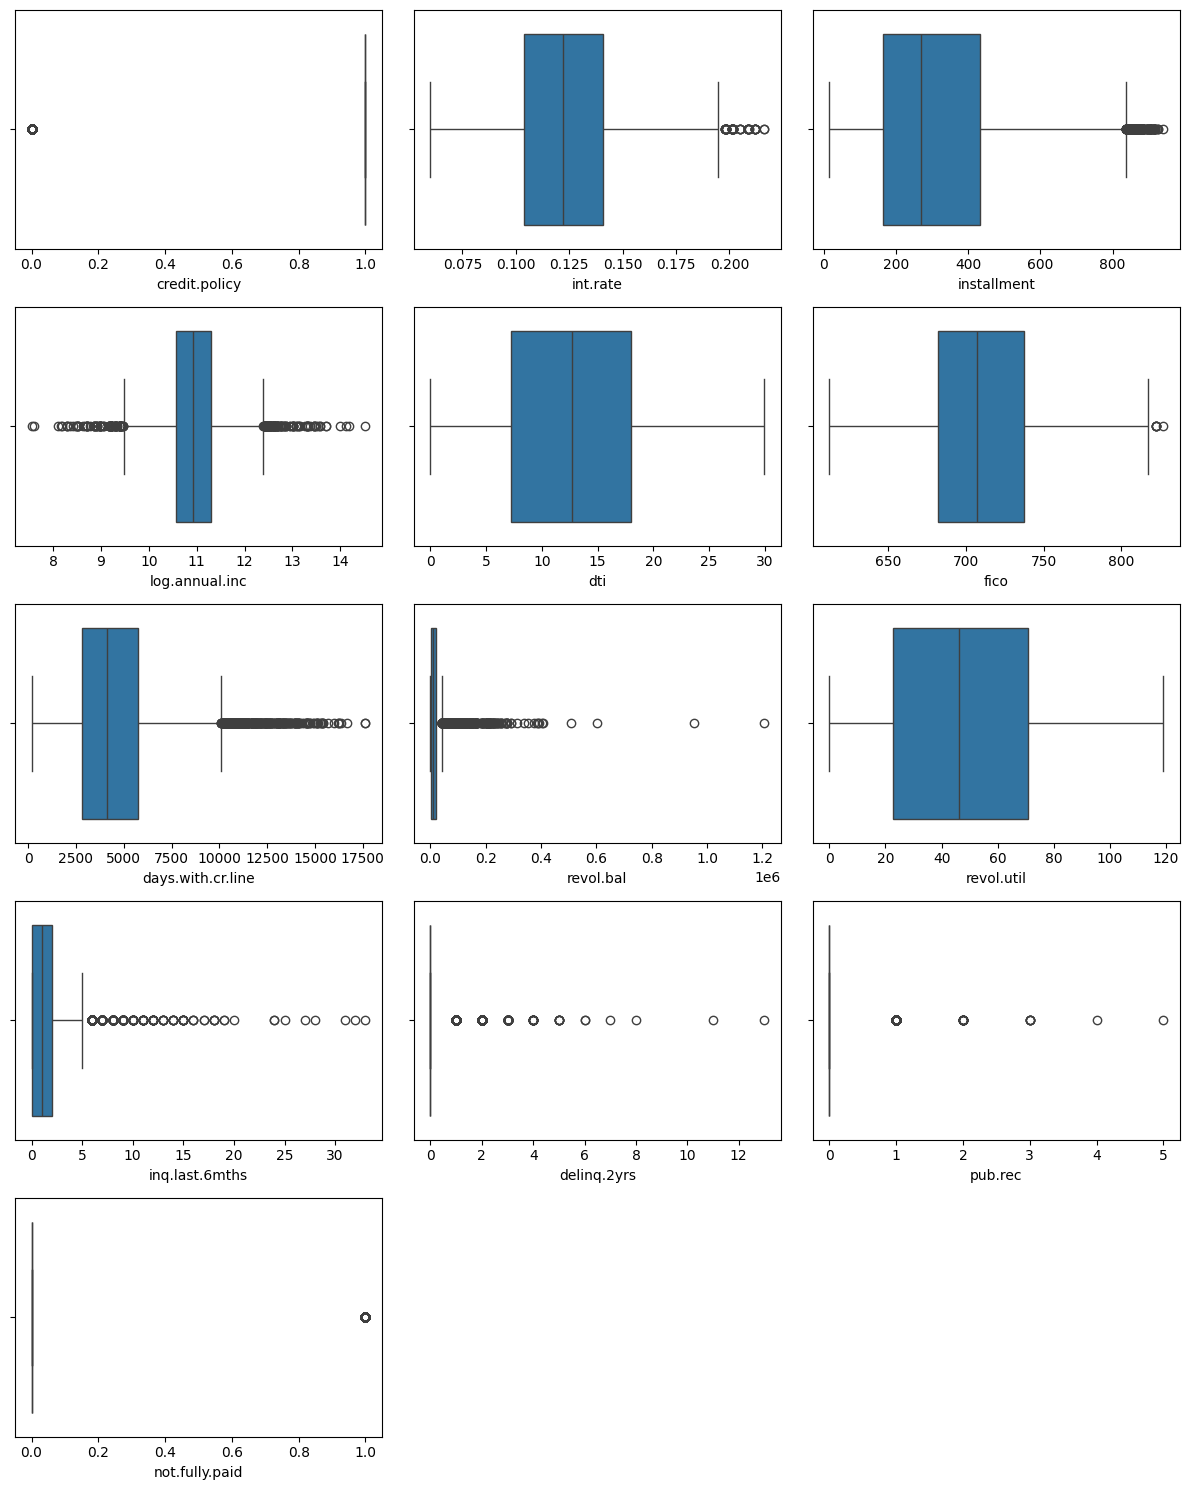

In [414]:
plot_univariate_numeric(df, num_cols, figsize=(12,6), kind = 'box');

In [415]:
# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from numerical columns
for col in num_cols:
    df = remove_outliers(df, col)

print(f"Shape after removing outliers: {df.shape}")

Shape after removing outliers: (4932, 14)


In [416]:
# Check for skewness and apply log transformation if needed
for col in num_cols:
    skewness = stats.skew(df[col])
    if abs(skewness) > 0.5:  # You can adjust this threshold
        df[f'{col}_log'] = np.log1p(df[col])
        print(f"Log transformation applied to {col}")

Log transformation applied to installment
Log transformation applied to days.with.cr.line
Log transformation applied to revol.bal
Log transformation applied to inq.last.6mths


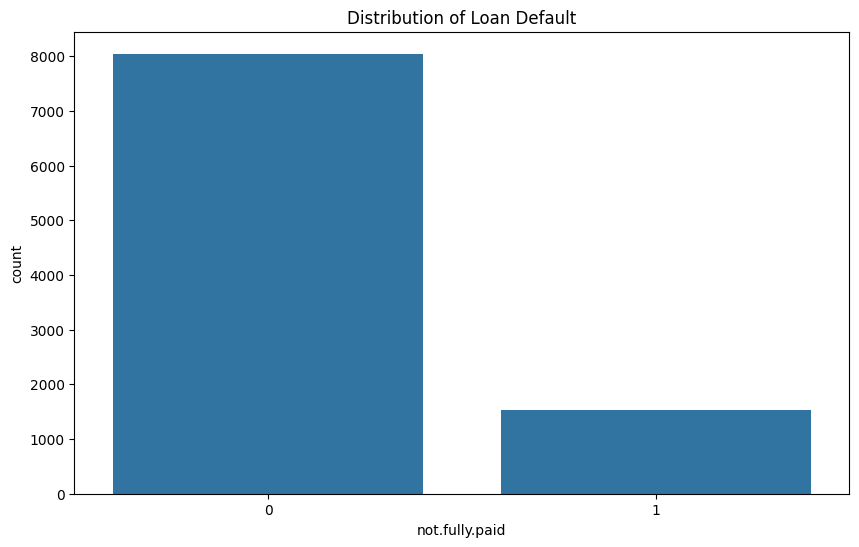

In [417]:
plt.figure(figsize=(10, 6))
sns.countplot(x='not.fully.paid', data=df_encoded)
plt.title('Distribution of Loan Default')
plt.show()

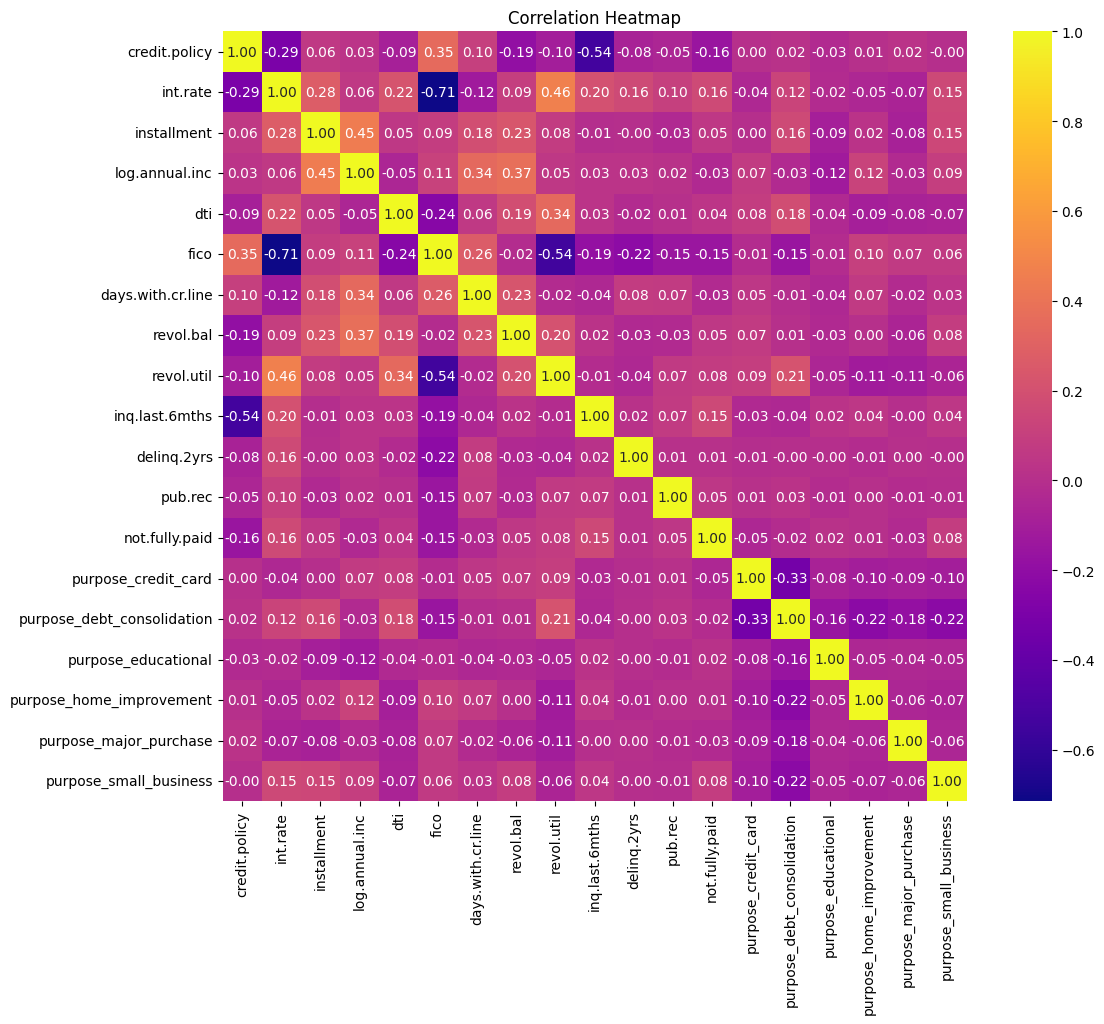

In [418]:
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(),
            annot=True,
            cmap='plasma',
            fmt='.2f'
           )
plt.title('Correlation Heatmap')
plt.show()

## 3. Additional Feature Engineering
1. You will check the correlation between features and drop those features that
have a strong correlation.
2. This will help reduce the number of features and leave you with the most
relevant features.

In [419]:
X = df_encoded.drop('not.fully.paid', axis=1)
Y = df_encoded['not.fully.paid']

In [420]:
# Feature Engineering
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Feature Selection
selector = SelectKBest(f_classif, k=20)  # Increased to 20 features
X_selected = selector.fit_transform(X_poly, Y)
selected_features = X_poly.columns[selector.get_support()].tolist()
X = X_poly[selected_features]

## Modeling
1. After applying EDA and feature engineering, you are now ready to build the
predictive models.
2. In this part, you will create a deep learning model using Keras with Tensorflow
backend.

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [422]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [423]:
# Handle imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [424]:
# Define the model
def create_model(hp):
    model = keras.Sequential([
        layers.Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), 
                     activation='relu', 
                     kernel_regularizer=keras.regularizers.l2(hp.Float('l2_1', min_value=1e-5, max_value=1e-2, sampling='log')), 
                     input_shape=(X_train_resampled.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)),
        layers.Dense(hp.Int('units_2', min_value=16, max_value=128, step=16), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [425]:
# Hyperparameter tuning
tuner = keras_tuner.Hyperband(
    create_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='keras_tuner'
)

Reloading Tuner from my_dir/keras_tuner/tuner0.json


In [427]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train_resampled, 
             y_train_resampled, 
             epochs=50, 
             validation_split=0.2, 
             callbacks=[stop_early])

In [428]:
# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

In [429]:
# Train the model with learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=best_hps.get('learning_rate'),
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.5848 - loss: 0.8636 - val_accuracy: 0.6709 - val_loss: 0.7327
Epoch 2/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.6159 - loss: 0.7557 - val_accuracy: 0.4786 - val_loss: 0.8967
Epoch 3/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.6487 - loss: 0.7083 - val_accuracy: 0.3904 - val_loss: 0.8890
Epoch 4/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.6500 - loss: 0.6942 - val_accuracy: 0.3745 - val_loss: 0.8696
Epoch 5/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.6470 - loss: 0.6872 - val_accuracy: 0.3998 - val_loss: 0.8741
Epoch 6/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6483 - loss: 0.6723 - val_accuracy: 0.3493 - val_loss: 0.8792
Epoch 7/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.6565 - loss: 0.6612 - val_accuracy: 0.4025 - val_loss: 0.8833
Epoch 8/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.6559 - loss: 0

In [430]:
# Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
              precision    recall  f1-score   support

           0       0.90      0.58      0.71      1611
           1       0.23      0.65      0.34       305

    accuracy                           0.59      1916
   macro avg       0.56      0.62      0.52      1916
weighted avg       0.79      0.59      0.65      1916

[[940 671]
 [107 198]]


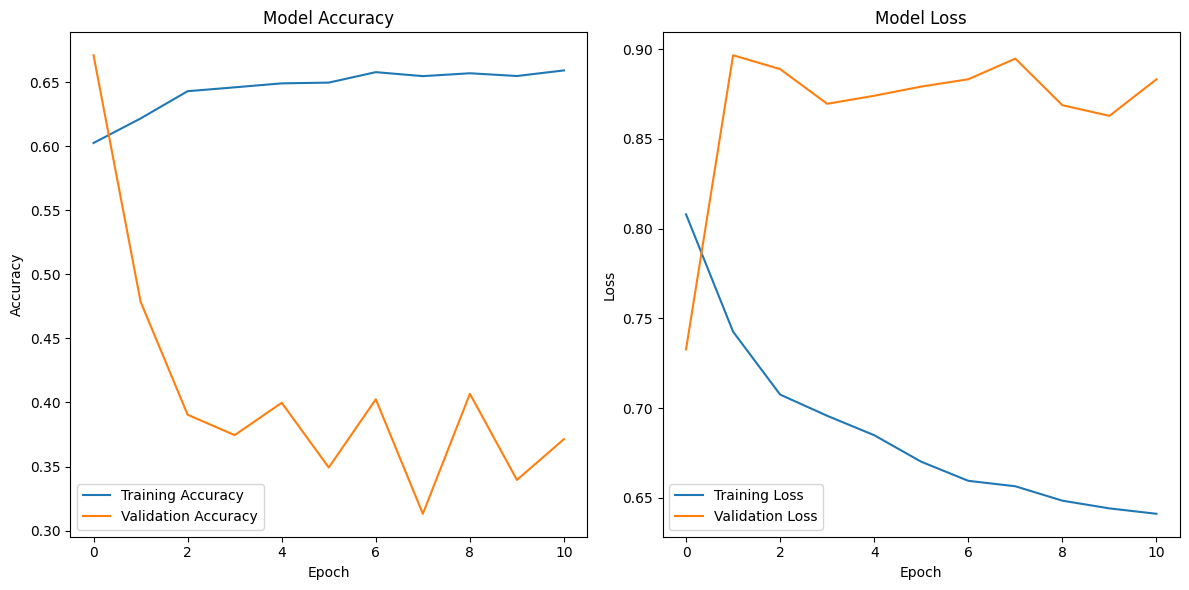

In [431]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [432]:
# Ensemble with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_ensemble = (y_pred.flatten() + y_pred_rf) / 2
y_pred_ensemble = (y_pred_ensemble > 0.5).astype(int)

print("Ensemble Model Performance:")
print(classification_report(y_test, y_pred_ensemble))
print(confusion_matrix(y_test, y_pred_ensemble))

Ensemble Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1611
           1       0.29      0.18      0.23       305

    accuracy                           0.80      1916
   macro avg       0.58      0.55      0.56      1916
weighted avg       0.77      0.80      0.78      1916

[[1477  134]
 [ 249   56]]
